In [117]:
import numpy as np

In [118]:
def compute_probabilities(X, theta, temp_parameter):
    """
    Computes, for each datapoint X[i], the probability that X[i] is labeled as j
    for j = 0, 1, ..., k-1

    Args:
        X - (n, d) NumPy array (n datapoints each with d features)
        theta - (k, d) NumPy array, where row j represents the parameters of our model for label j
        temp_parameter - the temperature parameter of softmax function (scalar)
    Returns:
        H - (k, n) NumPy array, where each entry H[j][i] is the probability that X[i] is labeled as j
    """
    n = X.shape[0]
    d = X.shape[1]
    k = theta.shape[0]
    tau = temp_parameter
    
    K = (theta @ X.T) / tau
    
    c_arr = []  # collect c values to maximize
    for i in range(n):
        x = X[i, :]
        prod_arr = (theta @ x) / tau
        c_arr.append(np.max(prod_arr))
        
    c_arr = np.array(c_arr)
    c_arr = np.tile(c_arr, (K.shape[0], 1))
    
    H = np.apply_along_axis(np.exp, 0, K - c_arr)
    sum_arr = np.apply_along_axis(np.sum, 0, H)[np.newaxis, :]  # converted to row vector
    H = H / sum_arr  # H has shape (k, n)

    return H

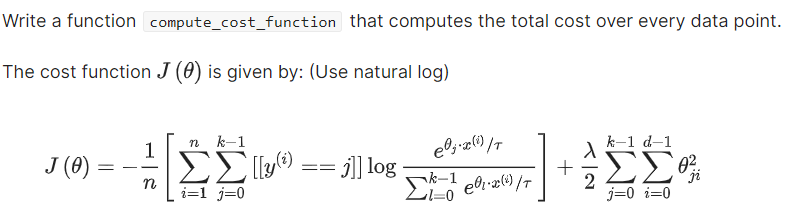

In [119]:
import numpy as np

def compute_probabilities(X, theta, temp_parameter):
    """
    Computes, for each datapoint X[i], the probability that X[i] is labeled as j
    for j = 0, 1, ..., k-1

    Args:
        X - (n, d) NumPy array (n datapoints each with d features)
        theta - (k, d) NumPy array, where row j represents the parameters of our model for label j
        temp_parameter - the temperature parameter of softmax function (scalar)
    Returns:
        H - (k, n) NumPy array, where each entry H[j][i] is the probability that X[i] is labeled as j
    """
    n = X.shape[0]
    d = X.shape[1]
    k = theta.shape[0]
    tau = temp_parameter
    
    K = (theta @ X.T) / tau
    
    c_arr = []  # collect c values to maximize
    for i in range(n):
        x = X[i, :]
        prod_arr = (theta @ x) / tau
        c_arr.append(np.max(prod_arr))
        
    c_arr = np.array(c_arr)
    c_arr = np.tile(c_arr, (K.shape[0], 1))
    
    H = np.apply_along_axis(np.exp, 0, K - c_arr)
    sum_arr = np.apply_along_axis(np.sum, 0, H)[np.newaxis, :]  # converted to row vector
    H = H / sum_arr

    return H

def compute_cost_function(X, Y, theta, lambda_factor, temp_parameter):
    """
    Computes the total cost over every datapoint.

    Args:
        X - (n, d) NumPy array (n datapoints each with d features)
        Y - (n, ) NumPy array containing the labels (a number from 0-9) for each
            data point
        theta - (k, d) NumPy array, where row j represents the parameters of our
                model for label j
        lambda_factor - the regularization constant (scalar)
        temp_parameter - the temperature parameter of softmax function (scalar)

    Returns
        J - the cost value (scalar)
    """
    n, d = X.shape
    k = theta.shape[0]

    # Compute probabilities matrix H
    H = compute_probabilities(X, theta, temp_parameter)
    
    # Apply natural logarithm to all elements of matrix H
    H_2 = np.apply_along_axis(np.log, axis=0, arr=H)
    
    # Create a filter matrix Y_2 such that if x[i] belongs to label j, Y_2[i, j] = 1, and 0 otherwise.
    Y_2 = np.zeros((k, n))
    for i in range(n):
        Y_2[Y[i], i] = 1
        
    """
    Y_2 == 1 creates a boolean array of the same shape as Y_2, where each element is True if the corresponding element in Y_2 is 1 and False otherwise.
    H_2[Y_2 == 1] uses this boolean array to index H_2, returning a flattened array of elements where the boolean array is True.
    """
    val_sum = np.sum(H_2[Y_2 == 1])  # we get the values sum after boolean indexing.
    reg = lambda_factor/2 * np.ravel(theta**2).sum()  # regularization term
    
    J = -1/n * val_sum + reg
    return J



In [120]:
import numpy as np

# Initialize an empty matrix with shape (0, 11)
gradients_matrix = np.empty((0, 11))

# Example loop where you get a gradient array in each iteration
num_iterations = 5  # Replace with the actual number of iterations
for _ in range(num_iterations):
    gradient = np.random.rand(1, 11)  # Example gradient of shape (1, 11)
    gradients_matrix = np.vstack((gradients_matrix, gradient))

print(gradients_matrix.shape)  # This will output (num_iterations, 11)


(5, 11)


In [121]:
import numpy as np

# Correcting the rows to have the same length by filling with np.nan
X = np.array([[  1,  45,  62,  11,  30,  70,  38,  15,  62,  54,  99],
              [  1,  63,  98,  11,  41,  46,  68,  36,  75,  39,  32],
              [  1,  85,  67,   8,  30,  25,  42,  87,  38,  17,  84],
              [  1,  37,  55,  28,  60,  92,  15,  98,  26, 0, 0],
              [  1,  45,  41,  21,  70,  46,  97,  79,   7,  99,  27],
              [  1,  53,  97,  24,  16,  69,  60, 115,  48,  36,  22],
              [  1,  86,  21,   8,  98,  24,  96,  37,  44,  26, 0],
              [  1,   3,  47,  83,  84,  74,  35,  62,  13,  92,  46],
              [  1,  29,  95,  23,  16,  67,  74,  58,   1,   5,  90],
              [  1,  68,  83,   4,  73,  42,  53,  48,  60,  63,  97]])

theta = np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])
Y = np.random.randn(X.shape[0])

temp_parameter = 1.0
lambda_factor = 0.0001

def run_gradient_descent_iteration(X, Y, theta, alpha, lambda_factor, temp_parameter):
    """
    Runs one step of batch gradient descent

    Args:
        X - (n, d) NumPy array (n datapoints each with d features)
        Y - (n, ) NumPy array containing the labels (a number from 0-9) for each
            data point
        theta - (k, d) NumPy array, where row j represents the parameters of our
                model for label j
        alpha - the learning rate (scalar)
        lambda_factor - the regularization constant (scalar)
        temp_parameter - the temperature parameter of softmax function (scalar)

    Returns:
        theta - (k, d) NumPy array that is the final value of parameters theta
    """
    n, d = X.shape
    k = theta.shape[0]
    H = compute_probabilities(X, theta, temp_parameter)  # compute probabilities matrix H
    gradients_matrix = np.zeros((k, d))
    # iterate over rows of theta matrix, where theta[m, :] is a vector
    # representing the parameters of our model for label/class m
    for m in range(k):
        y_bool = (Y == m).astype(int).reshape((n, 1))  # create a boolean array, reshape to row vector
        # each gradient will be a (1, d) row vector
        gradient = (-1/(temp_parameter*n) * np.sum(X * (y_bool.reshape((n, 1)) - H[m, :].reshape((n, 1))), axis=0) + lambda_factor*theta[m, :]).reshape((1, d))
        # vertically stack the gradient vectors as rows, will result in a (k, d) gradients matrix
        gradients_matrix[m, :] = gradient
    theta = theta - alpha * gradients_matrix
    return theta

# print("X:", X)
print("theta:", theta)
print("theta.shape:", theta.shape)
# print("temp_parameter:", temp_parameter)
# print("lambda_factor:", lambda_factor)


theta: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
theta.shape: (1, 11)


In [122]:
run_gradient_descent_iteration(X, Y, theta, 0.01, 0.1, 0.1)

array([[-0.1 , -5.14, -6.66, -2.21, -5.18, -5.55, -5.78, -6.35, -3.74,
        -4.31, -4.97]])

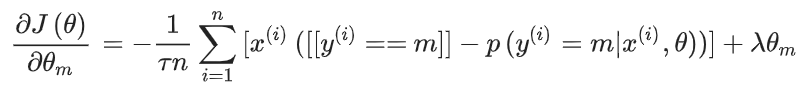